# Loan Eligibility Prediction

### Problem Statement-
> Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

> The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Task-
> To build a ML model that will predict whether a person is eligible for Loan

## Data-
There are 2 datasets present- `loan-test.csv` and `loan-tran.csv`

### Data Dictionary-
* **Loan_ID**- Unique Loan ID
* **Gender**- MAle or Female
* **Married**- Applicant married (Y/N)
* **Dependents**- Number of dependents
* **Education**- Applicant Education (Graduate/ Under Graduate)
* **Self_Employed**- Self-employed (Y/N)
* **ApplicantIncome**- Applicant income
* **CoapplicantIncome**- Coapplicant income
* **LoanAmount**- Loan amount in thousands
* **Loan_Amount_Term**- Term of a loan in months
* **Credit_History**- credit history meets guidelines
* **Property_Area**- Urban/ Semi-Urban/ Rural
* **Loan_Status**- Loan approved (Y/N)

### Required Tools-

In [1]:
#regular EDA(exploratory data analysis) and plotting libraries-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#plots appear inside the notebook
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


#dataSplitting and shuffling
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

#pipeline and feature scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#hyperparameter tuning and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
#loading the data
df=pd.read_csv("Datasets/loan-train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Collecting information on the Dataset

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


dtypes: float64(4), int64(1), object(8)

RangeIndex: 614 entries
Data columns: 13 columns

In [4]:
# Checking Missing Values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing Values

* Gender- 13 --object 
* Married- 3 --object
* Dependents- 15 --object
* Self_Employed- 32 --object
* LoanAmount- 22 --float64
* Loan_Amount_Term- 14 --float64
* Credit_History- 50 --float64

#### Converting Object datatypes into numbers and Filling Missing Values

In [5]:
def convert_categorical_data(df):
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #turn categories into numbers and add+1
            df[label]=pd.Categorical(content).codes+1
    return df

In [6]:
#function to process Loan_Status
def process_loan_status(df):
    df["Loan_Status"].replace(to_replace=[1,2],value=[0,1],inplace=True)
    return df

### Data after Preprocessing Object dtype

* **Gender**: 2-*male*, 1-*female*, 0-*NULL*
* **Education**: 1-*Graduate*, 0-*Not Graduate*
* **Married**: 1-*No*, 2-*Yes*, 0-*NULL*
* **Dependants**: 1-*0*, 1-*2*, 2-*3+*, 0-*NULL*
* **Self_Employed**: 1-*No*, 2-*Yes*, 0-*NULL*
* **Property_Area**: 3-*Urban*, 1-*Rural*, 2-*Semiurban*
* **Loan_Status**: 1-*Y*, 0-*N*

### Filling Numerical Missing Values

In [7]:
#numerical columns which have null value
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

LoanAmount
Loan_Amount_Term
Credit_History


In [8]:
#Filling NULL values with Median
def fill_numeric_values(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            #fill the missing values with median
            df[label]=content.fillna(content.median())
    return df

In [9]:
# function to call all preprocessing data functions
def process_data(df):
    #convert categorical to numerical data
    df=convert_categorical_data(df)
    #process loan status
    df=process_loan_status(df)
    #fill missing numerical values
    df=fill_numeric_values(df)
    
    return df

## Exploratory Data Analysis(EDA) Using Processed Data

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


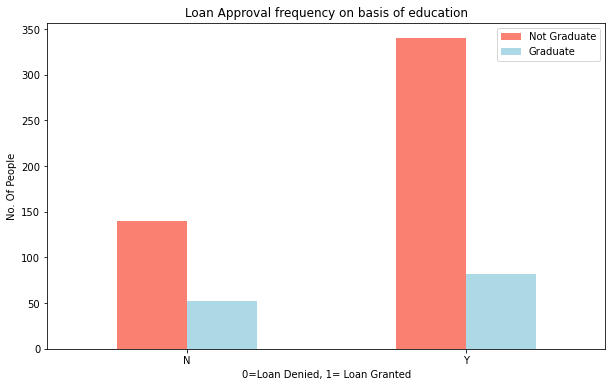

In [11]:
# create a plot of crosstab of education vs loan status
pd.crosstab(df.Loan_Status,df.Education).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Loan Approval frequency on basis of education")
plt.xlabel("0=Loan Denied, 1= Loan Granted")
plt.ylabel("No. Of People")
plt.xticks(rotation=0);
plt.legend(["Not Graduate","Graduate"]);

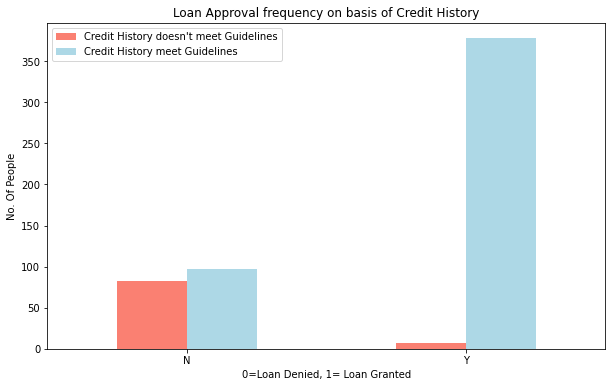

In [12]:
# create a plot of crosstab of credit vs loan status
pd.crosstab(df.Loan_Status,df.Credit_History).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Loan Approval frequency on basis of Credit History")
plt.xlabel("0=Loan Denied, 1= Loan Granted")
plt.ylabel("No. Of People")
plt.xticks(rotation=0);
plt.legend(["Credit History doesn't meet Guidelines","Credit History meet Guidelines"]);

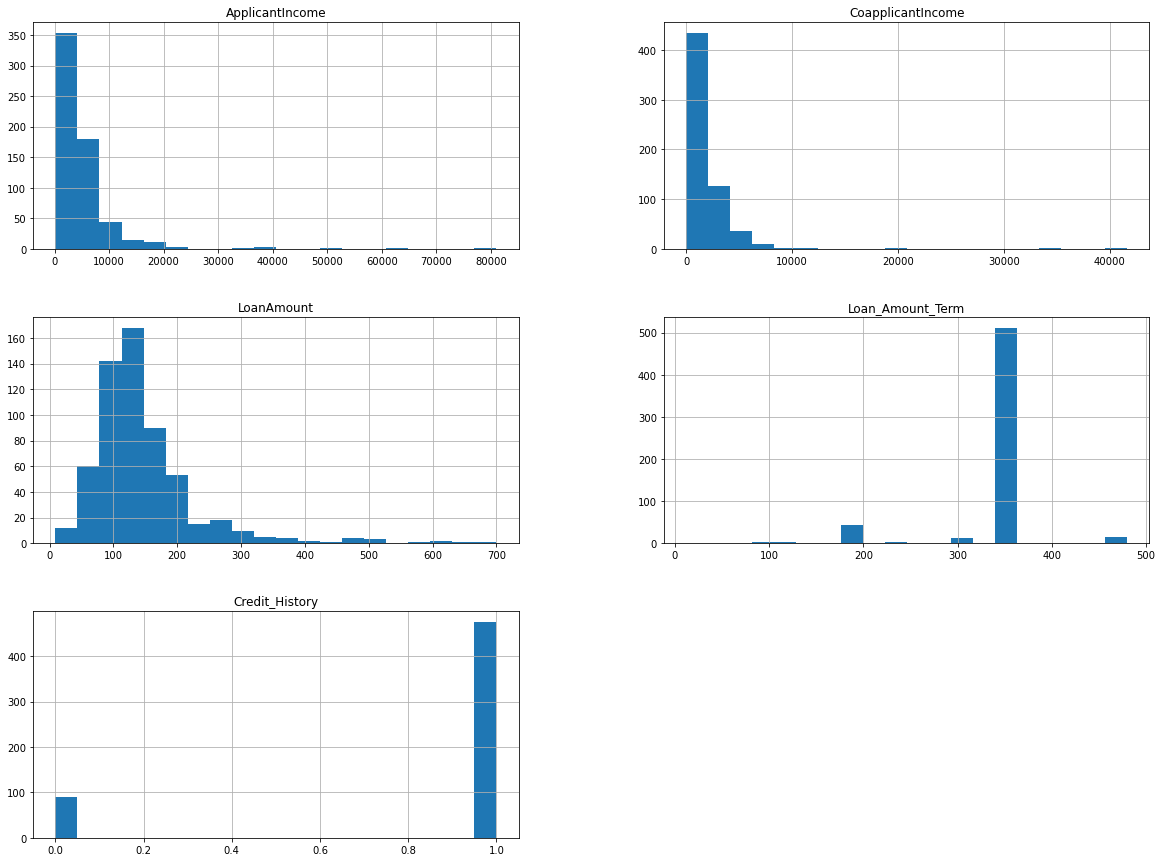

In [13]:
df.drop("Loan_ID",axis=1).hist(bins=20,figsize=(20,15));

**Inference-**
>1. Loan Acceptance Rates of Graduates is more than that of not graduates
>2. Loan Acceptance Rates of People with credit history-0 is almost NULL
>3. The No. of self employed applicants is really high as infered from the histogram data

In [14]:
#function call to process data
df=process_data(df)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,1,1,1,1,5849,0.0,128.0,360.0,1.0,3,1
1,2,2,2,2,1,1,4583,1508.0,128.0,360.0,1.0,1,0
2,3,2,2,1,1,2,3000,0.0,66.0,360.0,1.0,3,1
3,4,2,2,1,2,1,2583,2358.0,120.0,360.0,1.0,3,1
4,5,2,1,1,1,1,6000,0.0,141.0,360.0,1.0,3,1


In [16]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,1.775244,1.643322,1.719870,1.218241,1.081433,5403.459283,1621.245798,145.752443,342.410423,0.855049,2.037459,0.687296
std,177.390811,0.465767,0.489511,1.039056,0.413389,0.423472,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,154.250000,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,307.500000,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,2.000000,1.000000
75%,460.750000,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,614.000000,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


### Plotting Loan Status with LoanAmount Vs ApplicantIncome

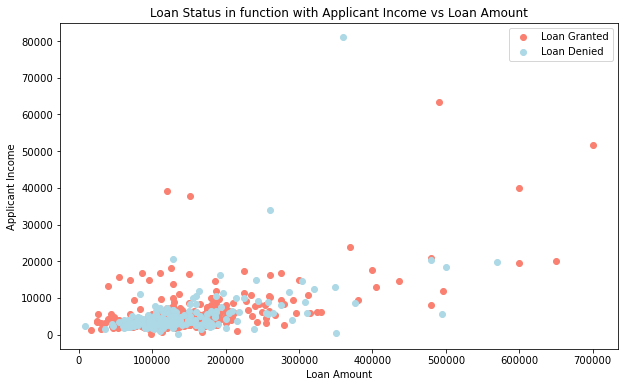

In [17]:
plt.figure(figsize=(10,6))

#scatter with poisitve examples(with Loan Granted)
plt.scatter(df.LoanAmount[df.Loan_Status==1]*1000,
            df.ApplicantIncome[df.Loan_Status==1],
            c="salmon")

#scatter with negative examples(with Loan Denied)
plt.scatter(df.LoanAmount[df.Loan_Status==0]*1000,
            df.ApplicantIncome[df.Loan_Status==0],
            c="lightblue")

#add some helpful info
plt.title("Loan Status in function with Applicant Income vs Loan Amount")
plt.ylabel("Applicant Income")
plt.xlabel("Loan Amount")
plt.legend(["Loan Granted","Loan Denied"]);

In [18]:
df["LoanAmount"]=df["LoanAmount"]*1000

### Correlation Matrix

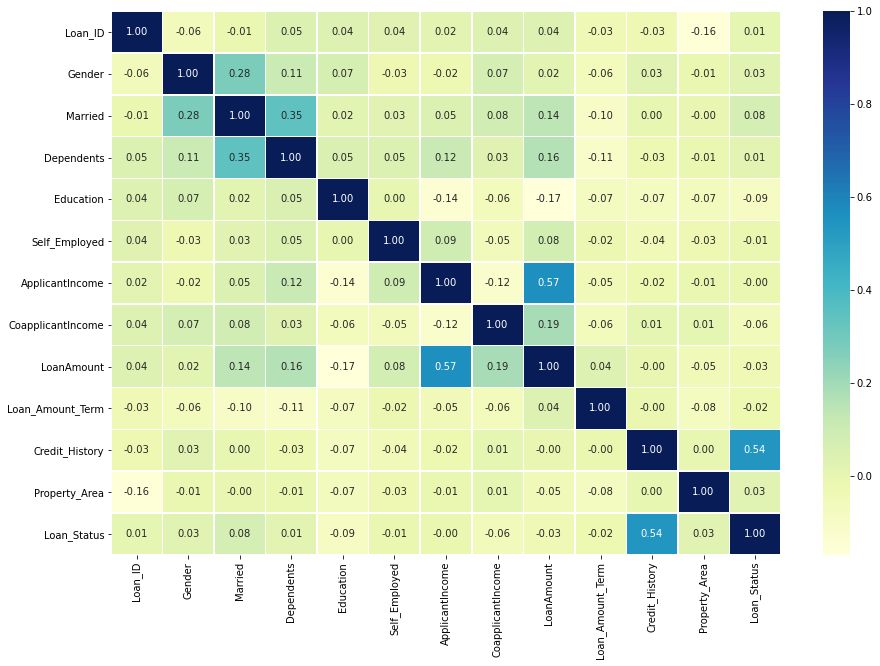

In [19]:
#correlation matrix
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

### Train Test Splitting
>Splitting Data into Training and testing sets so that the model does not overfit

In [20]:
df_modelling=df.drop("Loan_ID",axis=1)
X=df_modelling.drop("Loan_Status",axis=1)
Y=df_modelling["Loan_Status"]

In [21]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [22]:
print(f"Rows in Train set: {len(X_train)}\nRows in Test set: {len(X_test)}")

Rows in Train set: 491
Rows in Test set: 123


**stratified sampling for to give equal ratios to train and test datasets**

In [23]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(df_modelling,df_modelling["Education"]):
    strat_train_set=df_modelling.loc[train_index]
    strat_test_set=df_modelling.loc[test_index]

In [24]:
strat_train_set["Education"].value_counts(),strat_test_set["Education"].value_counts()

(1    384
 2    107
 Name: Education, dtype: int64,
 1    96
 2    27
 Name: Education, dtype: int64)

#### Scatter Matrix for Data Evaluation

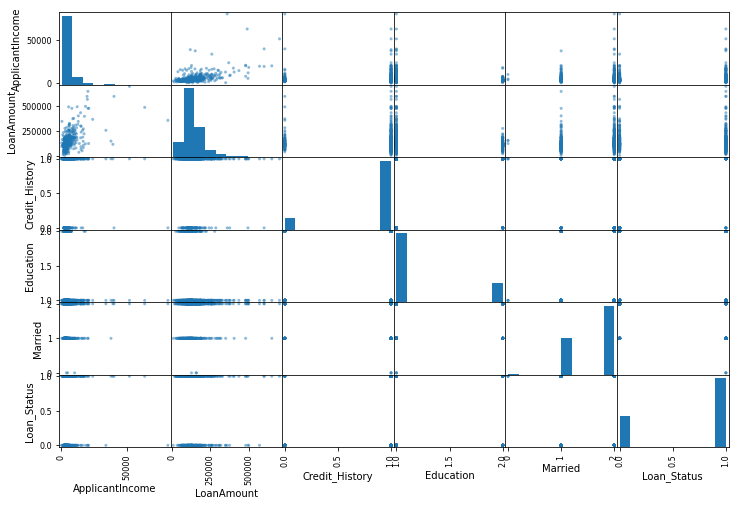

In [25]:
attributes=["ApplicantIncome","LoanAmount","Credit_History","Education","Married","Loan_Status"]
scatter_matrix(df_modelling[attributes],figsize=(12,8));

### Scikit-Learn Design

Primarily, there are 3 types of objects
1. estimators- estimates some parameters based on a dataset(eg- imputer)
It has a `fit` method and a `transform` method
Fit Method- Fits the dataset and calculates internal parameters
2. transformers- Transform method takes input and returns output based on the learnings from Fit
3. predictors- Logistic regression is an eg. of a classifier, Comes with 2 common functions, `fit()` and `predict()`. Also gives a `score()` to evaluate the Fit

### Feature Scaling
there are 2 types of feature scaling methods primarily-
1. MinMaxScalling(Normalization)- (value-min)/(max-min)
    sklearn provides a class called MinMaxScaler for this
2. Standardization- (value-mean)/std
    sklearn provides a class called Standard Scaler for this

## ML Pipeline

In [26]:
#scalling the dataset and applying classification models
def model_scaled(model):
    pipeline=Pipeline([
        ('std_scaler',StandardScaler()),
        ('model',model)
    ])
    pipeline.fit(X_train,Y_train)
    return pipeline.score(X_test,Y_test)

In [27]:
#model dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(n_neighbors=15),
       "Random Forest":RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1),
       "Naive Bayes":GaussianNB(),
       "SGD":SGDClassifier(loss="modified_huber",shuffle=True,random_state=42),
       "Decison Tree":DecisionTreeClassifier(max_depth=10,random_state=42,max_features=None,min_samples_leaf=15),
       "SVM":SVC(kernel="linear",C=0.025,random_state=42)}

In [28]:
#function to try different models
def fit_and_score(models):
    np.random.seed(42)
    model_scores={}
    
    for name,model in models.items():
        model_scores[name]=model_scaled(model)
        
    return model_scores

In [29]:
model_scores=fit_and_score(models=models)
model_scores

{'Logistic Regression': 0.7886178861788617,
 'KNN': 0.7967479674796748,
 'Random Forest': 0.7804878048780488,
 'Naive Bayes': 0.7804878048780488,
 'SGD': 0.6422764227642277,
 'Decison Tree': 0.7398373983739838,
 'SVM': 0.7886178861788617}

#### Model Accuracies Visualised

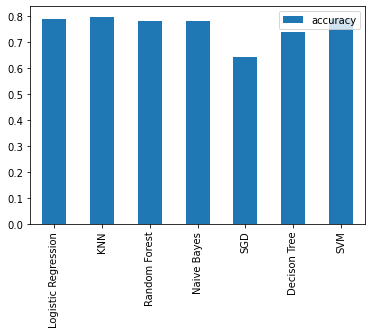

In [30]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [31]:
max(model_scores,key=model_scores.get)

'KNN'

### `KNeighborsClassifier()` gives the Highest Accuray

Hyperparameter tuning for the `KNN` and `LogisticRegression`

In [32]:
#knn hyperparameter tuning
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [33]:
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 11, 'p': 2}

In [34]:
clf.score(X_test,Y_test)

0.6178861788617886

#### Hyperparameter Tuning Pipeline

In [35]:
%%time
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   12.5s


Wall time: 13.2 s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.1s finished


In [36]:
best_clf.best_params_

{'classifier': LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear'),
 'classifier__C': 0.23357214690901212,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [37]:
best_clf.score(X_test,Y_test)

0.7886178861788617

#### Tuning Model on Cross-Validated Set

In [38]:
clf=LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8078368652538984

## Model Evaluation

Evaluating the model based on the following metrices:
1. Classification Repor
2. Confusion Matrix
3. Precision Score, F1 Score, Recall Score
4. ROC Curve

In [39]:
Y_preds=best_clf.predict(X_test)

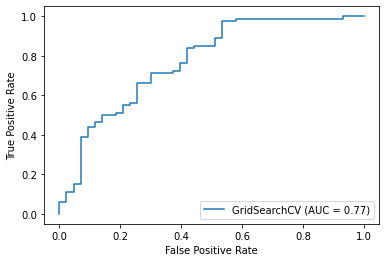

In [40]:
#ROC Curve and AUC Calculation
plot_roc_curve(best_clf,X_test,Y_test);

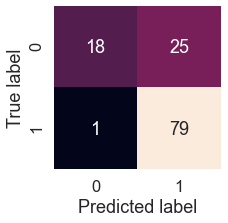

In [41]:
#Confusion MAtrix
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test,Y_preds):
    """
    Plots a nice confusion matrix using seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,Y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(Y_test,Y_preds)

#### Classification Report

In [42]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Feature Importance

feature importance is another way of asking which feature contributed most to the outcome of the model and how?

Finding feature importance is different for each ML model

Let's find the featur importance for then logistic regression model

In [43]:
#fit the model for coef calculation
np.random.seed(42)
clf.fit(X_test,Y_test)

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [44]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.54497787e-05,
        -6.29147132e-05, -9.99487723e-07, -2.86478785e-03,
         2.06206334e+00,  0.00000000e+00]])

In [45]:
#creating a feature dictionary
feature_dict=dict(zip(df_modelling.columns, list(clf.coef_[0])))
feature_dict

{'Gender': 0.0,
 'Married': 0.0,
 'Dependents': 0.0,
 'Education': 0.0,
 'Self_Employed': 0.0,
 'ApplicantIncome': 2.544977867862237e-05,
 'CoapplicantIncome': -6.291471320515504e-05,
 'LoanAmount': -9.994877225532725e-07,
 'Loan_Amount_Term': -0.002864787853255422,
 'Credit_History': 2.0620633369319985,
 'Property_Area': 0.0}

## Making Predictions on `loan-test.csv`

In [46]:
#import test data
df_test=pd.read_csv("Datasets/loan-test.csv")
df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [47]:
df_loan_id=df_test["Loan_ID"]
df_loan_id.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [48]:
df_test.drop("Loan_ID",axis=1,inplace=True)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Data Preprocessing

In [49]:
np.random.seed(42)
df_test=convert_categorical_data(df_test)
df_test=fill_numeric_values(df_test)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,2,1,1,1,5720,0,110.0,360.0,1.0,3
1,2,2,2,1,1,3076,1500,126.0,360.0,1.0,3
2,2,2,3,1,1,5000,1800,208.0,360.0,1.0,3
3,2,2,3,1,1,2340,2546,100.0,360.0,1.0,3
4,2,1,1,2,1,3276,0,78.0,360.0,1.0,3


#### Predicting on Test Data

In [50]:
test_preds=clf.predict(df_test)

In [51]:
test_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [52]:
#creating validation csv
df_preds=pd.DataFrame()
df_preds["Loan_ID"]=df_loan_id
df_preds["Loan_status"]=test_preds

In [56]:
df_preds["Loan_status"].replace(to_replace=[1,0],value=["Yes","No"],inplace=True)

In [58]:
df_preds.head()

,Loan_ID,Loan_status
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes


## Exporting Predicted Model

In [59]:
df_preds.to_csv("Datasets/predictied_model.csv",index=False)